In [7]:
#Importing Libraries
import pandas as pd #data manipluation
import numpy as np #mathematical functions
import seaborn as sns # data visulation  advance from matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder #catehoricsl to numeric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
data=pd.read_csv("C:/Users/lenovo/OneDrive/Desktop/Student_Performance.csv")
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Exploring the data

In [8]:
data.shape

(10000, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
data['Extracurricular Activities'].describe()

count     10000
unique        2
top          No
freq       5052
Name: Extracurricular Activities, dtype: object

In [12]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [13]:
data.duplicated().sum()

127

# As the data consists of duplicates, we will remove the duplicates from the data


In [14]:
data.drop_duplicates(inplace=True,ignore_index=False)
data.duplicated().sum()

0

In [15]:
plt.style.use('ggplot')

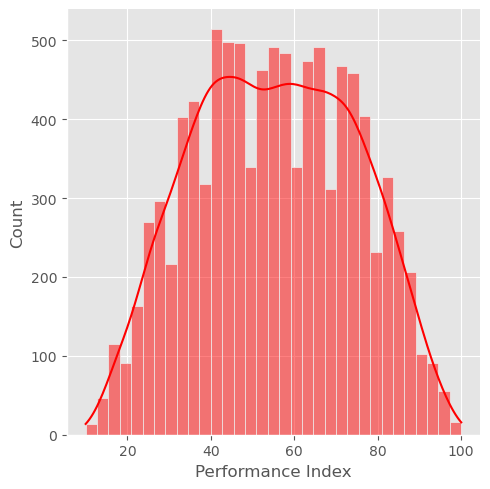

In [16]:
#Understanding data through Visualization
sns.displot(x='Performance Index',data=data,kde=True,color='red');

*From the above Histogram, students Performance Index is mosltly 40-60 percent*

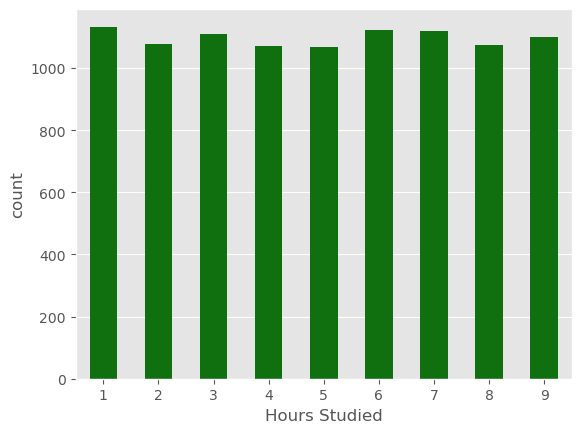

In [17]:
sns.countplot(x='Hours Studied',data=data,color='green',width=0.5);


*The count of no.of hours studied by studies are almost same*

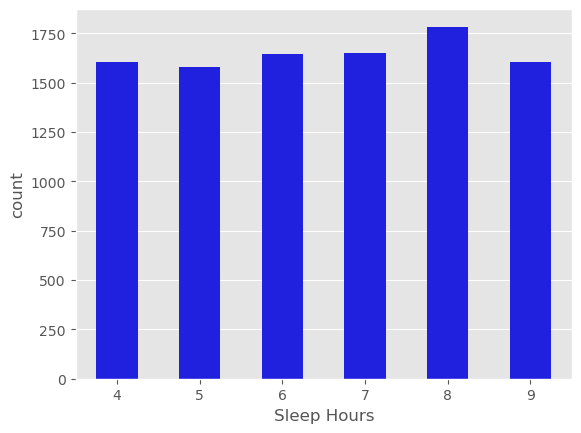

In [18]:
sns.countplot(x='Sleep Hours',data=data,color='blue',width=0.5);

*The above graph shows a peek around 8 hours of sleep, suggesting that this may be the most common sleep duration*

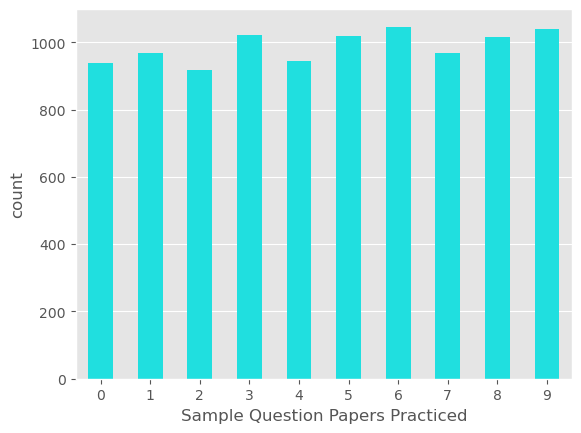

In [19]:
sns.countplot(x='Sample Question Papers Practiced',data=data,color='cyan',width=0.5);

The above graph shows a peak around 6 Sample Question Papers practiced

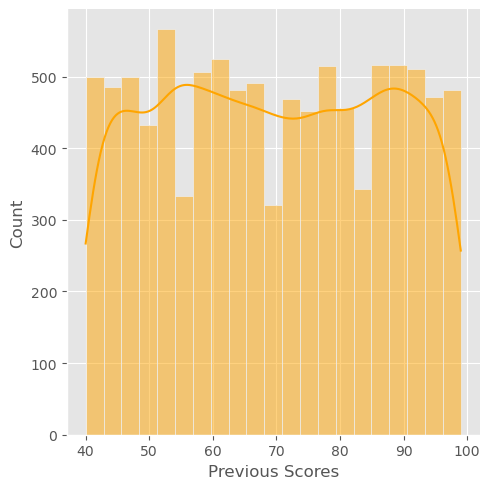

In [20]:
sns.displot(x='Previous Scores',data=data,color='orange',kde=True);

The histogram suggests that most of the students got Previous Scores in between 50-60.

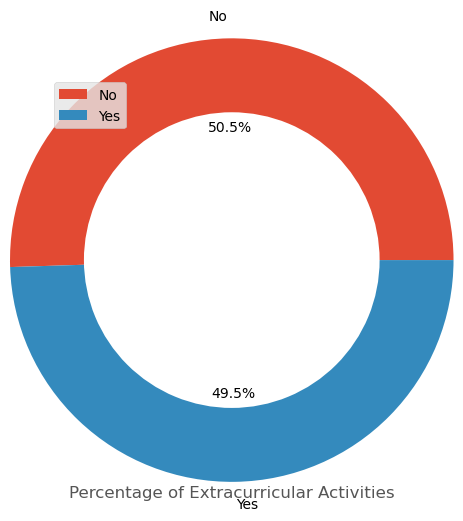

In [21]:
data.groupby('Extracurricular Activities').size().plot(kind='pie',autopct='%0.1f%%',radius=1.5)
plt.pie([1],colors='white',radius=1)
plt.xlabel('\n\nPercentage of Extracurricular Activities')
plt.legend(loc=2);

From the above Pie Chart, 50.5% of the students were not active in the Extracurricular Activities and the remaining 49.5% are active.


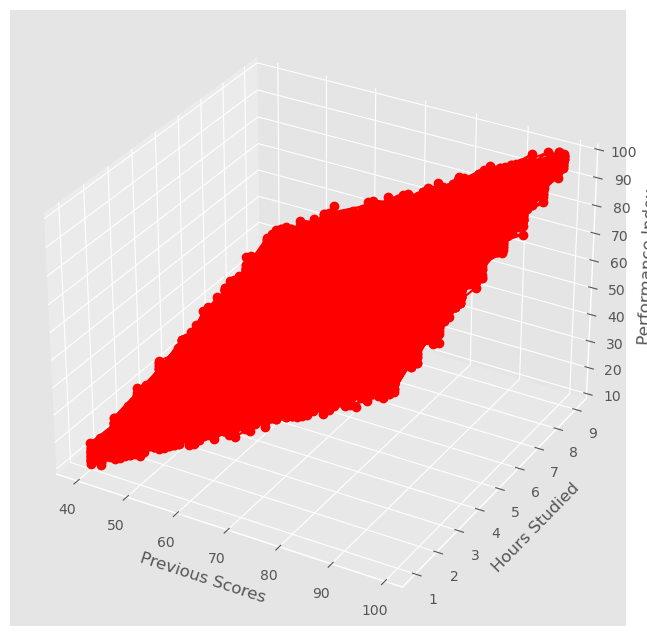

In [22]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(111,projection='3d')

ax.plot(xs=data['Previous Scores'],ys=data['Hours Studied'],zs=data['Performance Index'],c='r',marker='o')
ax.set_xlabel('Previous Scores')
ax.set_ylabel('Hours Studied')
ax.set_zlabel('Performance Index');

As the Machine Learning model only accepts integer values, we label the Extracurricular Activities showing 'Yes' or 'No' to 1 or 0. This is a stage in data preprocessing.

In [23]:
le=LabelEncoder()

data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1840\1179669352.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,2]=le.fit_transform(data.iloc[:,2])


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Drop the dependent variable from the data and assign it to a new variable. Also assign the dependent variable to a new variable.

In [24]:
X=data.drop('Performance Index',axis=1).values
y=data['Performance Index'].values
X

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]], dtype=int64)

In [25]:
y

array([91., 65., 45., ..., 74., 95., 64.])

Split the dependent and independent variables into a training and testing dataset.Fit the training data to the Regression model and predict the values of testing data.

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,random_state=6,train_size=0.75,test_size=0.25)

Training a model using Multiple Regression.

In [27]:
regressor=LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred_reg=regressor.predict(X_test)

y_pred_reg

array([33.87135817, 65.58040505, 21.36663654, ..., 45.76969615,
       67.36052676, 46.20522922])

In [29]:
np.concatenate((y_test.reshape(-1,1),y_pred_reg.reshape(-1,1)),axis=1)

array([[35.        , 33.87135817],
       [67.        , 65.58040505],
       [19.        , 21.36663654],
       ...,
       [43.        , 45.76969615],
       [67.        , 67.36052676],
       [47.        , 46.20522922]])

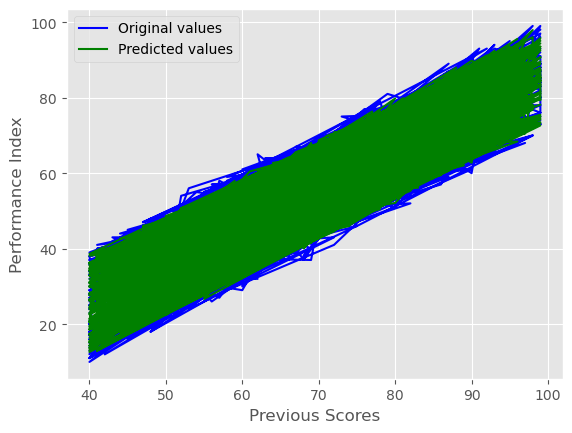

In [30]:
plt.plot(X_test[:,1],y_test,label='Original values',color='blue')
plt.plot(X_test[:,1],y_pred_reg,label='Predicted values',color='green')

plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend();

From the graph, the predicted values almost fits to the original values. We conclude that the predictions predicted by the model is highly accurate.

Let's calculate the metrics of model

In [31]:
r2_score(y_test,y_pred_reg)

0.9889477154575314

### Decision tree Model

In [32]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [33]:
y_pred_dt= regressor.predict(X_test)
y_pred_dt

array([36. , 62. , 20.5, ..., 46. , 67. , 46. ])

In [34]:
r2_score(y_test,y_pred_dt)

0.9748840737398091

### SVR

In [35]:
from sklearn.svm import SVR
Regressor_sv= SVR()
Regressor_sv.fit(X_train,y_train)

SVR()

In [36]:
y_pred_sv = Regressor_sv.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_sv.reshape(len(y_pred_sv),1),y_test.reshape(len(y_test),1)),1))

[[33.83 35.  ]
 [66.17 67.  ]
 [23.58 19.  ]
 ...
 [46.7  43.  ]
 [68.69 67.  ]
 [46.25 47.  ]]


In [37]:
r2_score(y_test,y_pred_sv)

0.9852654803123788

### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
y_pred_rf = regressor.predict(X_test)
y_pred_rf

array([36. , 62. , 20.5, ..., 46. , 67. , 46. ])

In [40]:
r2_score(y_test,y_pred_rf)

0.9748840737398091

### K Neighbors

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
y_pred_kn = knn_regr.predict(X_test)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_kn})

,Actual,Predicted
0,35.0,33.0
1,67.0,64.2
2,19.0,21.2
3,61.0,65.2
4,59.0,57.0
...,...,...
2464,38.0,39.4
2465,18.0,22.4
2466,43.0,49.4
2467,67.0,66.8


In [43]:
r2_score(y_test,y_pred_kn)

0.9832307113964552

In [44]:
knn_regr.predict([[7,85,0,6,6]])

array([75.8])

In [47]:
import tkinter as tk

from tkinter import messagebox

def predict_performance():
    # Placeholder prediction code
    predicted_grade =  model.predict([[int(entry_hours_studied.get()),
                int(entry_previous_scores.get()),
                int(entry_extracurricular_activities.get()),
                int(entry_sleep_hours.get()),
                int(entry_sample_question_papers.get())
                ]])
    
    # Placeholder messagebox to display predicted grade
    messagebox.showinfo("Predicted Performance", f"The predicted grade is: {predicted_grade[0]}")
# Creating the main window
root = tk.Tk()
root.title("Student Performance System")

# Creating labels and entry fields for input

label_hours_studied = tk.Label(root, text="Enter hours studied:")
label_hours_studied.pack()
entry_hours_studied = tk.Entry(root)
entry_hours_studied.pack()

label_previous_scores = tk.Label(root, text="Enter previous scores:")
label_previous_scores.pack()
entry_previous_scores = tk.Entry(root)
entry_previous_scores.pack()

label_extracurricular_activities = tk.Label(root, text="Enter extracurricular activities:")
label_extracurricular_activities.pack()
entry_extracurricular_activities = tk.Entry(root)
entry_extracurricular_activities.pack()

label_sleep_hours = tk.Label(root, text="Enter sleep hours:")
label_sleep_hours.pack()
entry_sleep_hours = tk.Entry(root)
entry_sleep_hours.pack()

label_sample_question_papers = tk.Label(root, text="Enter sample question papers practiced:")
label_sample_question_papers.pack()
entry_sample_question_papers = tk.Entry(root)
entry_sample_question_papers.pack()

# Creating predict button 
predict_button = tk.Button(root, text="Predict Performance", command=predict_performance)
predict_button.pack()

# Running the main loop
root.mainloop()